# Data Analist


> This is block for test

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly as py
import datetime


### Importing csv file

In [2]:
data = pd.read_excel('multiPages.xlsx')

In [4]:
# data.head()

## Feature Enginering

### Which year made the most top rated anime

This is for ALL data

In [15]:
years = np.arange(197,203,1).tolist()

for year in years:
    patternY = str(year)

    yearMask = data['AirDate'].str.contains(patternY)
    anime_Year = (data[yearMask])

    print('Top animes in decade', patternY, '\b0 :' , len(anime_Year))

Top animes in decade 1970 : 4
Top animes in decade 1980 : 10
Top animes in decade 1990 : 27
Top animes in decade 2000 : 94
Top animes in decade 2010 : 250
Top animes in decade 2020 : 115


In [55]:
infoMonth = []
# If not like this, its sorted alphabeticly[Apr-Sep]
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep','Oct', 'Nov', 'Dec']

for month in months:
    patternM = (month)
    monthMask = data['AirDate'].str.contains(patternM)
    anime_Month = (data[monthMask])

    print('Number animes in', patternM,' :' ,len(anime_Month))
    # print(strMonth)
    infoMonth.append(anime_Month)   ## To find the dataframe acc. to month index

# (list(multiPage.AirDate.groupby(multiPage.AirDate.dt.year)))


Number animes in Jan  : 79
Number animes in Feb  : 19
Number animes in Mar  : 17
Number animes in Apr  : 110
Number animes in May  : 5
Number animes in Jun  : 7
Number animes in Jul  : 63
Number animes in Aug  : 24
Number animes in Sep  : 27
Number animes in Oct  : 106
Number animes in Nov  : 15
Number animes in Dec  : 28


---
------
## Only TV shows

### Clean-up
<!-- > test -->

In [106]:
dataTV = data.loc[data.Type == 'TV'].copy()

In [22]:
dataTV.columns

Index(['Rank', 'Title', 'Rating', 'Type', 'AirDate', 'EndDate', 'TotalEpi',
       'Members', 'MAL Ref', 'Status', 'Premiered', 'Broadcast', 'Studio',
       'Duration', 'Age Ratingn', 'Genres', 'Producer', 'Demograph', 'Themes',
       'Source'],
      dtype='object')

Formatting

In [107]:
# cols_org = ['Rank', 'Title', 'Rating', 'Type', 'AirDate', 'EndDate', 'TotalEpi',
#        'Members', 'MAL Ref', 'Status', 'Premiered', 'Broadcast', 'Studio',
#        'Duration', 'Age Ratingn', 'Genres', 'Producer', 'Source']



dataTV['AirDate_dt'] = pd.to_datetime(dataTV.AirDate, infer_datetime_format=True)
dataTV['EndDate_dt'] = pd.to_datetime(dataTV.EndDate, infer_datetime_format=True)


### ---Dropping unneeded coloms
# dataTV = dataTV.drop(columns=['AirDate', 'EndDate'])

## Reorganizing coloms
dataTV = dataTV[['Rank', 'Title', 'Rating', 'Type', 'AirDate_dt', 'EndDate_dt', 'TotalEpi',
                'Members', 'MAL Ref', 'Status', 'Premiered', 'Broadcast', 'Studio',
                'Duration', 'Age Ratingn', 'Genres', 'Producer', 'Demograph', 'Themes',
                'Source']]



In [11]:
# dataTV.info()

--------
------
### Released Stas

-----
#### Monthl released
AirDates

In [798]:
# dataTV.AirDate_dt.astype('datetime64[ns]')
# dataTV.AirDate_dt.dt.month_name().value_counts().sort_index()

Number anmies in Jan : 63
Number anmies in Feb : 1
Number anmies in Mar : 1
Number anmies in Apr : 88
Number anmies in May : 2
Number anmies in Jun : 3
Number anmies in Jul : 42
Number anmies in Aug : 2
Number anmies in Sep : 1
Number anmies in Oct : 93
Number anmies in Nov : 2
Number anmies in Dec : 4


<Axes: title={'center': 'Months the top 500 animes were released'}, xlabel='Months', ylabel='Counts'>

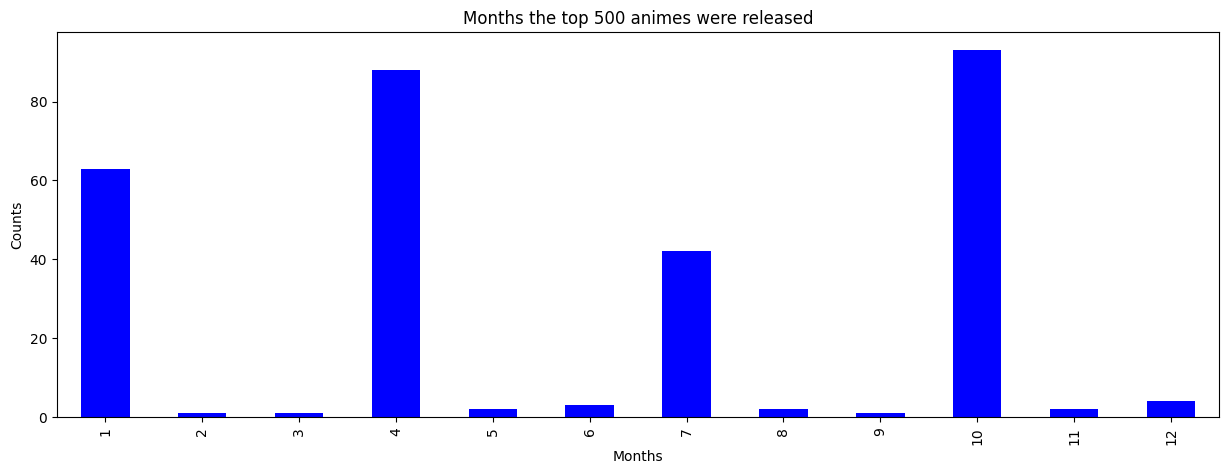

In [7]:
monthCount = dataTV.AirDate_dt.dt.month.value_counts().sort_index()

j=0
for i in monthCount:
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep','Oct', 'Nov', 'Dec']
    print(f'Number anmies in {months[j]} : {i}')
    j=j+1


monthCount.plot(kind='bar',
                xlabel='Months', 
                ylabel='Counts',
            
                title='Months the top 500 animes were released',
                color = 'blue',
                # rot=90 ##Rotate x value names,
                figsize=(15,5)
                  )

# dataTV.AirDate_dt.dt.year.value_counts().sort_index()

In [8]:
dataTV['Aired_months'] = dataTV.AirDate_dt.dt.month

<Axes: xlabel='Aired_months'>

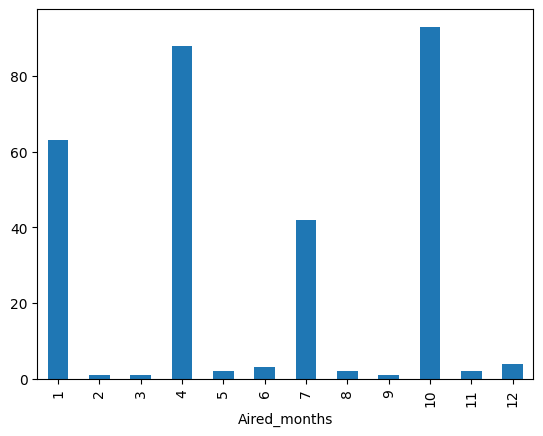

In [9]:
dataTV.groupby('Aired_months')['Aired_months'].count().plot.bar()

In [175]:
# py.plot(kind='bar',
#         data_frame=monthCount      
#         )

##### Can Delete This

In [17]:
# months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep','Oct', 'Nov', 'Dec']

# monthsCounts = dataTV.AirDate.str.split(' ').str[0].value_counts()

# for i in months:
#     print(f'Number anmies in {i} : {monthsCounts[i]}')


# #--------------------

# monthsCounts[months].plot(kind='bar',
#                           xlabel='Months', 
#                           ylabel='Counts',
#                           title='Months the top 500 animes were released',
#                           color = 'blue',
#                         # rot=90 ##Rotate x value names,
#                         figsize=(15,5)
#                           )


As we can see from the graph and and printed data, most top animes was released in year quaters.

----
####  Seasonly released

Premiered

In [10]:
dataTV['Premiered_Season'] =dataTV.Premiered.str.split(' ').str[0]

Text(0.5, 1.0, 'Seasonly Releases')

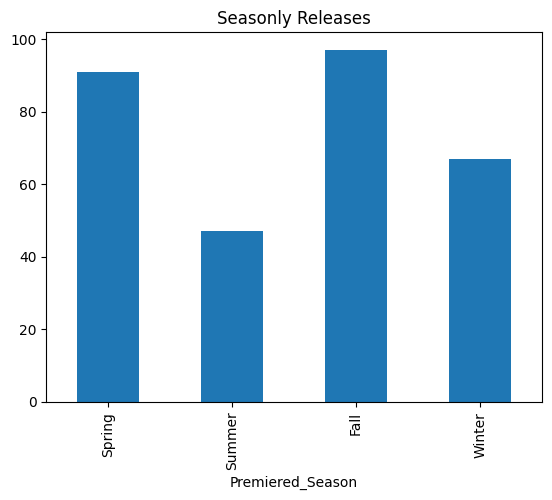

In [11]:
seasonGroup = dataTV.groupby('Premiered_Season')
season_count = seasonGroup['Premiered_Season'].count()

season_count = season_count.reindex(['Spring', 'Summer', 'Fall', 'Winter'])

ax = season_count.plot.bar()
ax.set_title('Seasonly Releases')

##### Other Season Count graph


In [305]:
# ### USE THIS WAY FROM NOW

# seasonsNew = dataTV.Premiered.str.split(' ').str[0].value_counts()

# print('Number animes in Fall:   ', seasonsNew[0])
# print('Number animes in Spring: ', seasonsNew[1])
# print('Number animes in Winter: ', seasonsNew[2])
# print('Number animes in Summer: ', seasonsNew[3])


# plt.barh(['Spring', 'Summer', 'Fall', 'Winter'], seasonsNew)
# plt.title('Amount of top animes for each Season')
# plt.ylabel('Total top animes released')

In [59]:
grouped = dataTV.groupby(['Premiered_Season', 'Broadcast'])

# grouped.count()

----
#### Yearly released for decade

Decades devide for each release

<!-- <br> - decades_data = dataTV.groupby((dataTV.AirDate_dt.dt.year//10)*10) -->


Text(0.5, 1.0, 'Top TV released per decade')

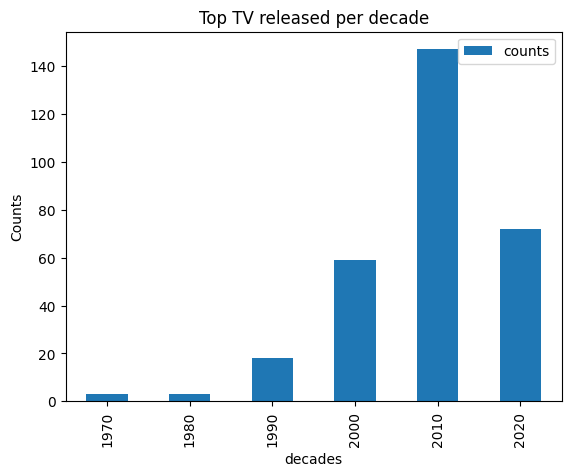

In [12]:
decade = (dataTV.groupby(dataTV.AirDate_dt.dt.year//10)).count()
decade.index.name ='decades'

decade = decade.reset_index().assign(decades=decade.index*10).rename(columns={'AirDate_dt':'counts'})
decade = decade.rename(columns={'AirDate_dt':'Counts'})

# decade

ax =  decade.plot.bar(x='decades', 
                      y='counts',
                      grid = False
                    )
ax.set_ylabel('Counts')
ax.set_title('Top TV released per decade')

In [ ]:
decade

,decades,Rank,Title,Rating,Type,counts,EndDate_dt,TotalEpi,Members,MAL Ref,Status,Premiered,Broadcast,Studio,Duration,Age Ratingn,Genres,Producer,Source
0,1970,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,1980,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,1990,18,18,18,18,18,16,18,18,18,18,18,18,18,18,18,18,18,18
3,2000,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59
4,2010,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147
5,2020,70,70,70,70,70,66,70,70,70,70,70,70,70,70,70,70,70,70


-------
*******
### Ratings Stats

##### Seasonal Rating

Text(0.5, 0, 'Rating avr')

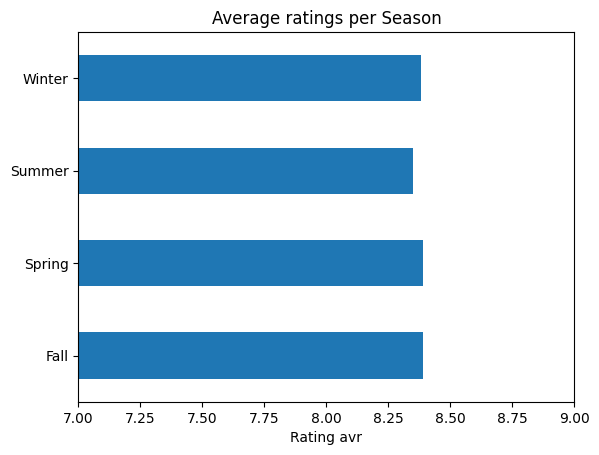

In [13]:
seasonal_rating = dataTV.groupby('Premiered_Season')['Rating']

seasonal_rating_avr = seasonal_rating.mean().round(2)

ax = seasonal_rating_avr.plot.barh()
ax.set_xlim(7,9)
ax.set_title('Average ratings per Season')
ax.set_ylabel(None)
ax.set_xlabel('Rating avr')


##### Monthly Ratings

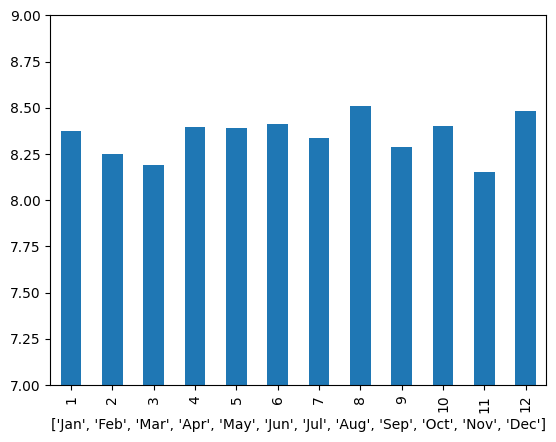

In [14]:
month_rating = dataTV.groupby('Aired_months')['Rating']
month_rating_mean = month_rating.mean()


# Creating and modifing plot
ax = month_rating_mean.plot.bar()
ax.set_xlabel(months)
ax.set_ylim(7,9)


month_rating_mean = month_rating_mean.reset_index()


In [288]:
# month_rating_mean.Aired_months

# month_rating_mean

In [300]:
month_rating.get_group(2)

290    8.25
Name: Rating, dtype: float64

#### Yearly ratings

(7.0, 10.0)

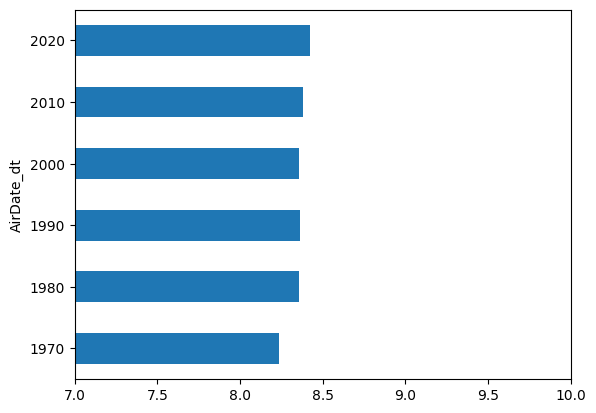

In [15]:
decades_data = dataTV.groupby((dataTV.AirDate_dt.dt.year//10)*10)

ax = decades_data['Rating'].mean().plot.barh()
ax.set_xlim(7,10)


In [ ]:
# dataTV.groupby(da)

In [ ]:
decade

-------
*******
### Broadcasts Stats

In [6]:
newDay = (dataTV.Broadcast[:5]).str[:-1]

# pd.to_datetime(newDay, infer_datetime_format=True)

newDay

0       Sunday
1      Tuesday
2    Wednesday
3    Wednesday
4     Saturday
Name: Broadcast, dtype: object

In [16]:
broadcast_group = dataTV.groupby(dataTV.Broadcast)

#### Wekkly released counts

In [17]:
## Each weekday count
broadcast_count = broadcast_group['Broadcast'].count()

#Drop elements
broadcast_count = broadcast_count.drop(['Not scheduled once per week\n', 'Unknown\n'])

# Reorder elements
broadcast_count = broadcast_count.reindex(['Mondays', 'Tuesdays', 'Wednesdays', 'Thursdays', 'Fridays', 'Saturdays', 'Sundays'])

Text(0, 0.5, 'Counts')

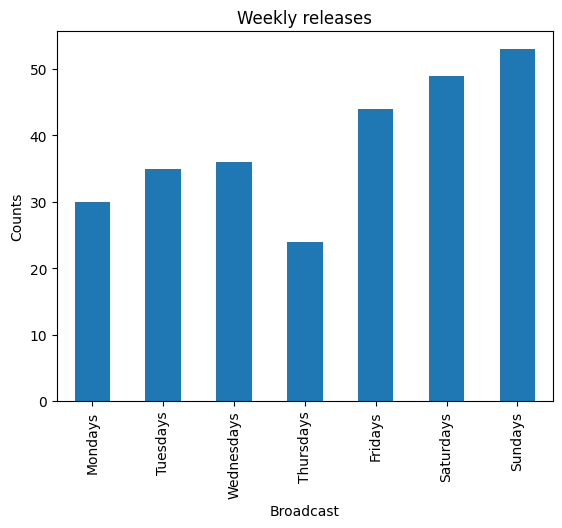

In [18]:
ax = broadcast_count.plot.bar()
ax.set_title('Weekly releases')
ax.set_ylabel('Counts')

#### Seasonly

<Axes: xlabel='Broadcast,Premiered_Season'>

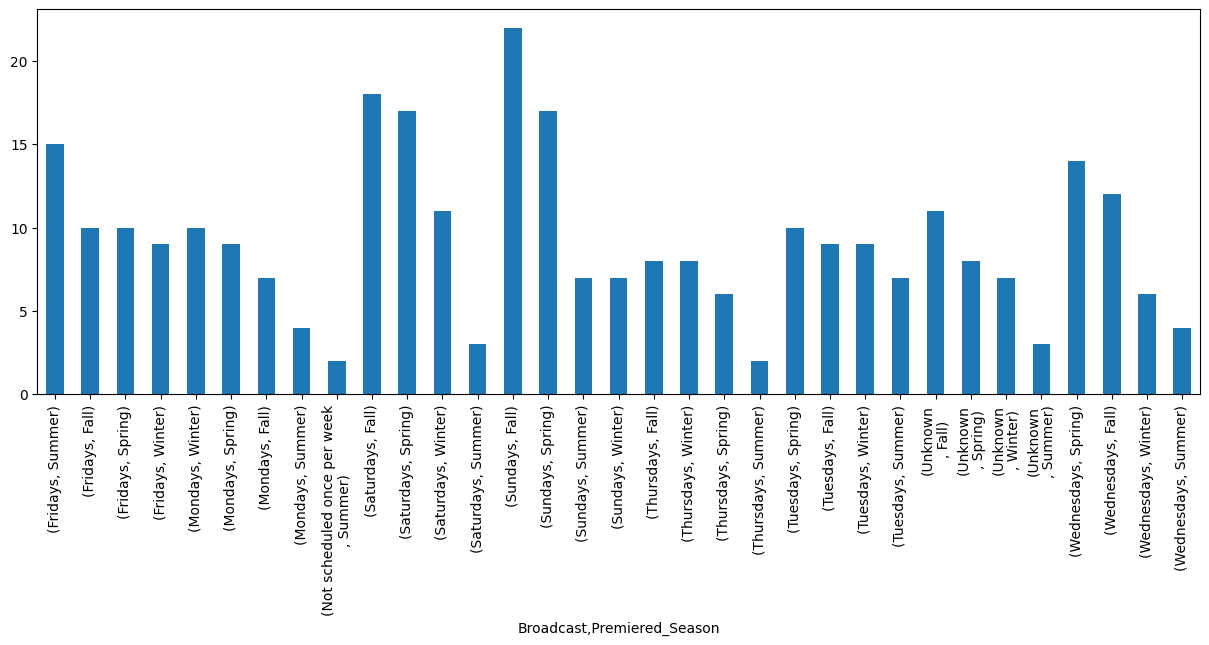

In [19]:
# %config InlineBackend.figure_format = 'retina'

# broadcast_group['Premiered_Season'].describe()
broadcast_group['Premiered_Season'].value_counts().plot.bar(figsize = (15,5))

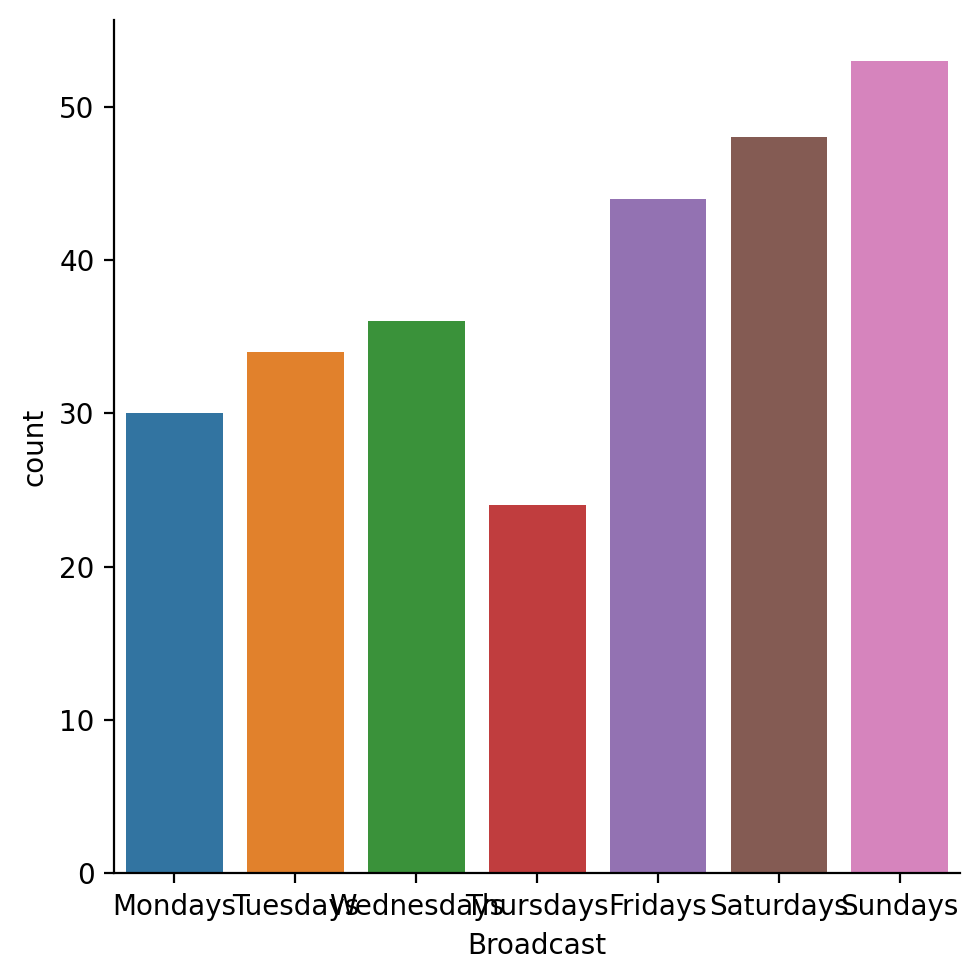

In [52]:
date_order = ['Mondays', 'Tuesdays', 'Wednesdays', 'Thursdays', 'Fridays', 'Saturdays', 'Sundays']

ax = sns.catplot(x= 'Broadcast',
               data = dataTV,
                kind = 'count',
                order= date_order,                
            )


AttributeError: 'NoneType' object has no attribute 'scatter'

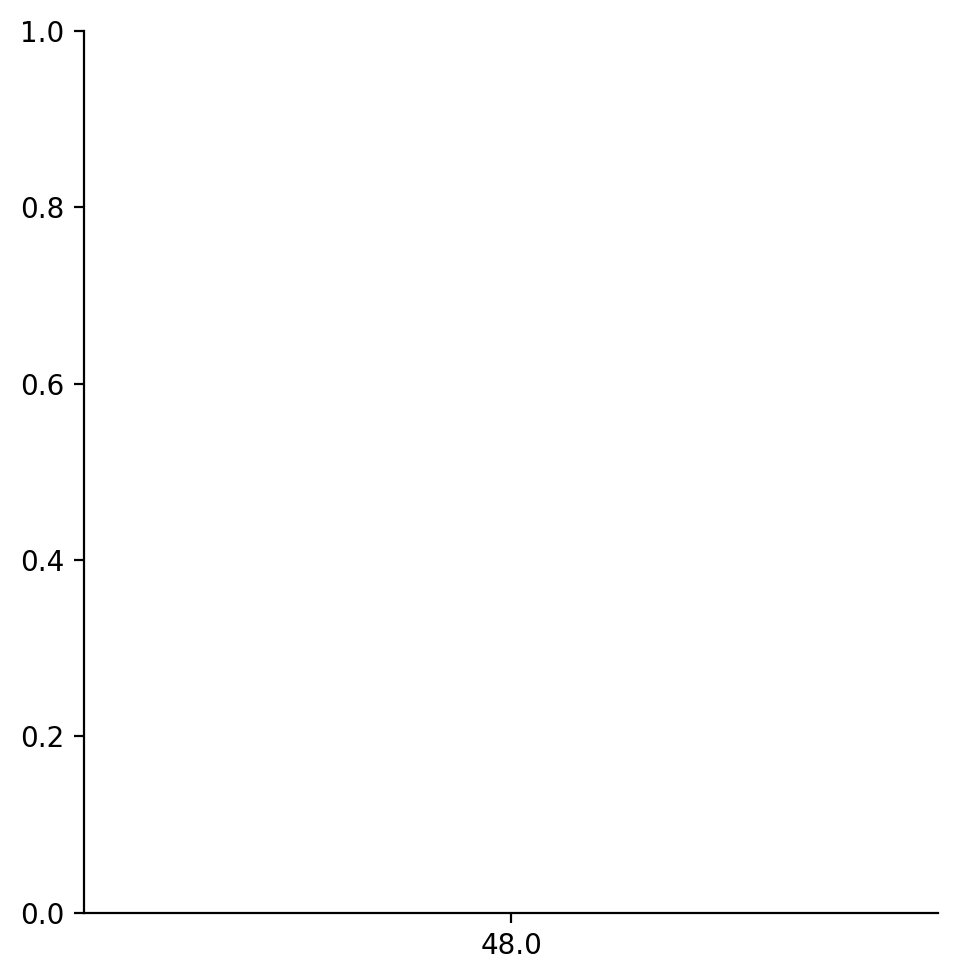

In [68]:
# sns.catplot(data = dataTV,
#             x = 'Premiered_Season',
#             col = 'Premiered_Season',
#             y='Broadcast',
#             kind = 'count')


sns.catplot( x = season_count,
            y = broadcast_count
            )

In [19]:
## Airing Days

dataTV.Broadcast.value_counts()

Sundays                          53
Saturdays                        48
Fridays                          44
Wednesdays                       36
Tuesdays                         34
Mondays                          30
Unknown\n                        29
Thursdays                        24
Not scheduled once per week\n     2
Name: Broadcast, dtype: int64

-----
-----
### Studios Stats

In [585]:
dataTV.Studio.value_counts()

Madhouse                    27
Production I.G              22
J.C.Staff                   16
Bones                       15
A-1 Pictures                15
Sunrise                     13
Wit Studio                  10
Brain's Base                10
Pierrot                      9
TMS Entertainment            9
Shaft                        9
Kyoto Animation              7
ufotable                     7
MAPPA                        7
White Fox                    7
Studio Deen                  7
SynergySP                    6
Lerche                       6
Bandai Namco Pictures        6
Toei Animation               5
CloverWorks                  5
David Production             4
feel.                        4
Hal Film Maker               4
OLM                          4
Artland                      4
8bit                         4
P.A. Works                   4
Studio Hibari                3
TROYCA                       3
Kinema Citrus                3
Nippon Animation             3
A.C.G.T.

--------
------
### Age Ratings

Text(0.5, 1.0, 'Age Rating Counts')

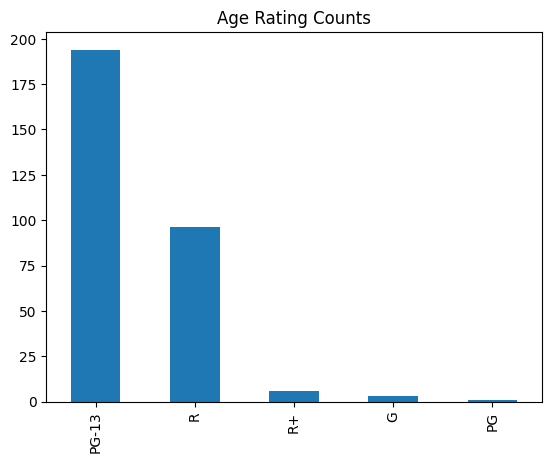

In [452]:
dataTV['Age Ratingn'].value_counts().plot.bar()

plt.title('Age Rating Counts')
# plt.grid()

In [942]:
dataTV['Age Ratingn'].value_counts()

PG-13    194
R         96
R+         6
G          3
PG         1
Name: Age Ratingn, dtype: int64

In [957]:
dataTV.groupby('Age Ratingn').count()


,Rank,Title,Rating,Type,AirDate_dt,EndDate,TotalEpi,Members,MAL Ref,Status,Premiered,Broadcast,Studio,Duration,Genres,Producer,Source,Premiered_Season
Age Ratingn,,,,,,,,,,,,,,,,,,
G,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
PG,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
PG-13,194,194,194,194,194,190,194,194,194,194,194,194,194,194,194,194,194,194
R,96,96,96,96,96,94,96,96,96,96,96,96,96,96,96,96,96,96
R+,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6


-----
----
### Generes

Fix after running other code again

In [372]:
genreNames = ['Action', 'Adventure', 'Avant Garde', 'Award Winning','Boys Love', 'Comedy', 
              'Drama', 'Fantasy', 'Girls Love', 'Gourmet', 'Horror', 'Mystery', 'Romance',
              'Sci-Fi', 'Slice of Life ', 'Sports', 'Supernatural', 'Suspense ']

In [539]:
len(genreNames)

18

<Axes: >

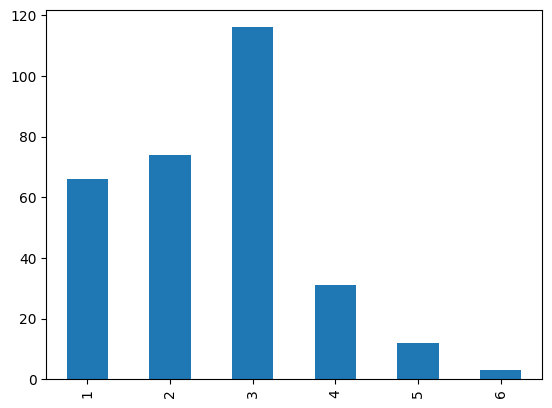

In [583]:
genreList = ((dataTV.Genres).str.split("'").str[1::2])

genreList.str.len().value_counts().sort_index().plot.bar()

In [585]:
first = genreList[1]


# first.count(genreNames[0])
first.count('Action')

1

In [556]:
genreList = genreList.reset_index()

In [705]:
actionList = []
adventureList = []
trueList = []

# for index, value in enumerate(genreNames):
for index, value in enumerate(genreList):
    # print(index,str(value))

    actionSum = (str(value.__contains__(genreNames[0]))).count('True')
    adventureSum = (str(value.__contains__(genreNames[1]))).count('True')



    (actionList.append(actionSum))
    (adventureList.append(adventureSum))

    # print('test', comedySum)  


print(genreNames[0],' len:/t',sum(actionList))
print(genreNames[1],' len:/t',sum(adventureList))

Action  len:/t 110
Adventure  len	: 59


In [490]:
# list(genreList.items())

genreList[1].count('Action' or 'Drama' or 'Romance')

1

----
-----
### Producers

<Axes: >

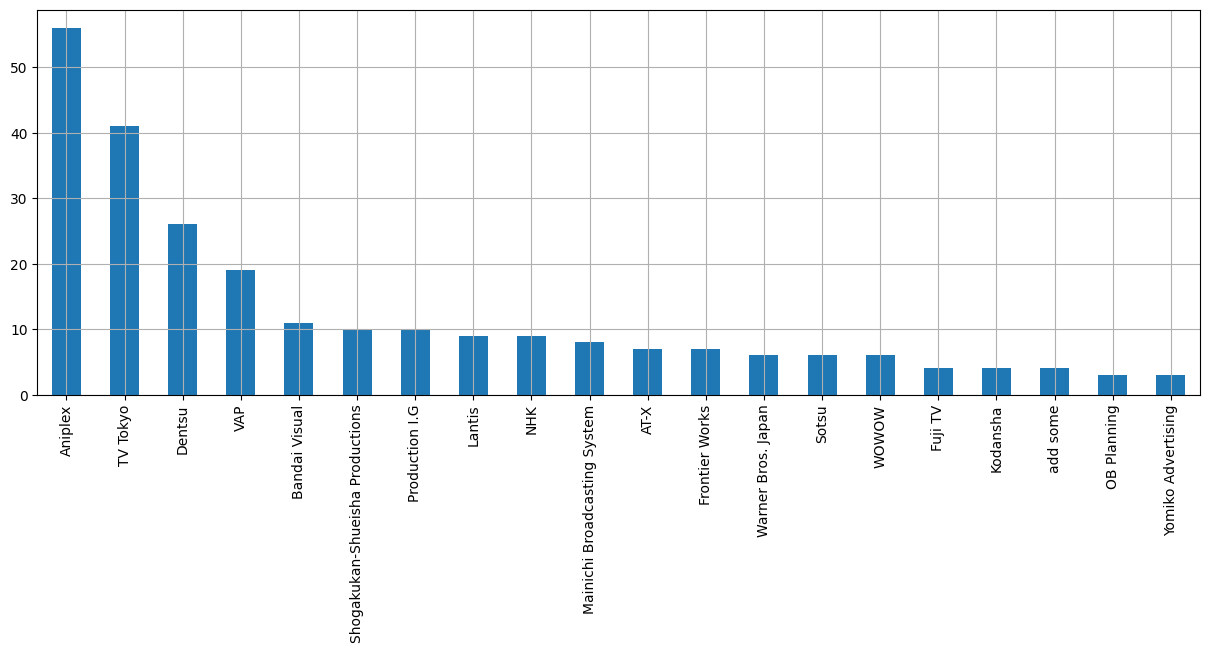

In [475]:
dataTV.Producer.value_counts()[:20].plot(kind='bar', figsize=(15,5), grid=True)

------
------
### Source

<Axes: >

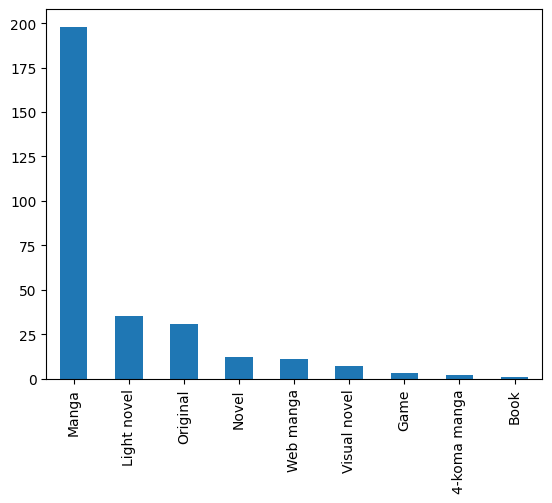

In [473]:
dataTV.Source.value_counts().plot(kind='bar')

-----
------
### Demograph

In [379]:
uniqueDemo = ['Josei', 'Kids', 'Seinen', 'Shoujo', 'Shounen'] 

In [31]:
demograph_group = dataTV.groupby(dataTV['Demograph'])

In [42]:
demograph_count = demograph_group['Demograph'].count()

demograph_count

Demograph
Josei       12
Kids         1
None       110
Seinen      51
Shoujo      17
Shounen    111
Name: Demograph, dtype: int64

Text(0, 0.5, 'Count')

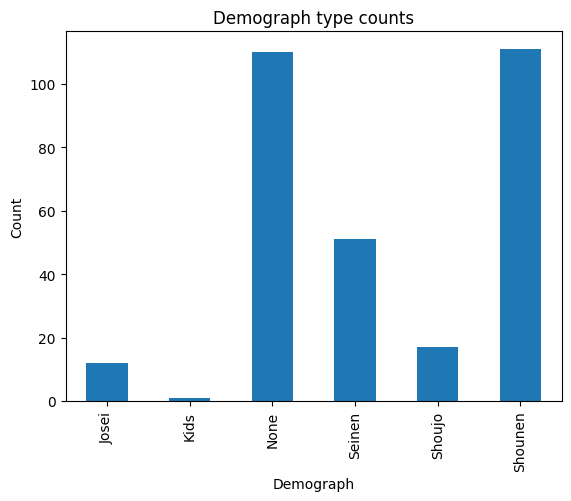

In [45]:
ax = demograph_count.plot.bar()
ax.set_title('Demograph type counts')
ax.set_ylabel('Count')

----
------
### Themes

In [376]:
uniqueThemes = ['Adult Cast ','Anthropomorphic',  'CGDCT ', 'Childcare ', 'Combat Sports ', 'Crossdressing ',
                 'Delinquents ', 'Detective ', 'Educational ', 'Gag Humor ', 'Gore ', 'Harem ', 'High Stakes Game ', 
                 'Historical ', 'Idols (Female) ', 'Idols (Male) ', 'Isekai ', 'Iyashikei ', 'Love Polygon ', 
                 'Magical Sex Shift ', 'Mahou Shoujo ', 'Martial Arts ', 'Mecha ', 'Medical ', 'Military ', 'Music ',
                 'Mythology ', 'Organized Crime ', 'Otaku Culture ', 'Parody ', 'Performing Arts ', 'Pets ', 'Psychological ',
                  'Racing ', 'Reincarnation ', 'Reverse Harem ', 'Romantic Subtex ', 'Samurai ', 'School ', 'Showbiz ', 
                  'Space ', 'Strategy Game ', 'Super Power ', 'Survival ', 'Team Sports ', 'Time Travel ', 'Vampire ', 
                  'Video Game ', 'Visual Arts ', 'Workplace ']

In [378]:
len(uniqueThemes)

50

In [268]:
(dataTV.Themes[3])



"['Psychological', 'Time Travel']"

In [336]:
# dataTV['themeList'] = ((dataTV.Themes).str.split("'"))

dataTV['themeList'] = ((dataTV.Themes).str.split("'").str[1::2])

# counts number of indexes
# dataTV.themeList.str.len()


# # Counts number cointaining certain number of themes
# # 121 entries have 1 themes
# # 101 enreies have 2 themes
# # 63 enreies have 3 themes
# # 16 enreies have 4 themes

((dataTV.Themes).str.split("'").str[1::2]).str.len().value_counts()


1    121
2    101
3     63
4     16
0      1
Name: Themes, dtype: int64

In [274]:
# ((dataTV.Themes[8]).split("'")[1::2])

((dataTV.themeList)).sort_values()

166               []
406     [Adult Cast]
233     [Adult Cast]
362     [Adult Cast]
326     [Adult Cast]
           ...      
113    [Time Travel]
35         [Vampire]
142        [Vampire]
217        [Vampire]
23         [Vampire]
Name: themeList, Length: 302, dtype: object

In [223]:
# themes_group = dataTV.groupby(dataTV['Themes'])   ## The original colom
themes_group = dataTV.groupby(dataTV['themeList'])

In [314]:
themes_group

In [310]:
# (dataTV.themeList)[:5].value_counts()
(dataTV.themeList).loc[:5]

1                                  [Military]
2                                      [None]
3                [Psychological, Time Travel]
4    [Gag Humor, Historical, Parody, Samurai]
5                                    [School]
Name: themeList, dtype: object

In [337]:
# Counts each adult cast occurance
dataTV.Themes.str.count('Adult Cast').sum()
dataTV.Themes.str.count('Childcare').sum()



7

In [353]:
((dataTV.Themes).str.split("'").str[1::2]).str

1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
       ..
494   NaN
495   NaN
497   NaN
498   NaN
499   NaN
Name: Themes, Length: 302, dtype: float64

----
-----
----
## Only Movies

In [932]:
data.loc[data.Type == 'Movie']


,Rank,Title,Rating,Type,AirDate,EndDate,TotalEpi,Members,MAL Ref,Status,Premiered,Broadcast,Studio,Duration,Age Ratingn,Genres,Producer,Source
6,7,Gintama: The Final,9.05,Movie,Jan 2021,Jan 2021,1,124969,39486,Finished Airing,NaN,NaN,Bandai Namco Pictures,1 hr. 44 min,PG-13,"['Action', 'Action', 'Comedy', 'Comedy', 'Dram...",TV Tokyo,Manga
13,14,Kaguya-sama wa Kokurasetai: First Kiss wa Owar...,8.97,Movie,Dec 2022,Dec 2022,1,94851,52198,Finished Airing,NaN,NaN,A-1 Pictures,1 hr. 36 min,PG-13,"['Comedy', 'Comedy', 'Drama', 'Drama', 'Romanc...",Aniplex,Manga
17,18,Koe no Katachi,8.94,Movie,Sep 2016,Sep 2016,1,2132019,28851,Finished Airing,NaN,NaN,Kyoto Animation,2 hr. 10 min,PG-13,"['Award Winning', 'Award Winning', 'Drama', 'D...",Shochiku,Manga
19,20,Gintama Movie 2: Kanketsu-hen - Yorozuya yo Ei...,8.92,Movie,Jul 2013,Jul 2013,1,224094,15335,Finished Airing,NaN,NaN,Sunrise,1 hr. 50 min,PG-13,"['Action', 'Action', 'Comedy', 'Comedy', 'Sci-...",TV Tokyo,Manga
21,22,Violet Evergarden Movie,8.91,Movie,Sep 2020,Sep 2020,1,519260,37987,Finished Airing,NaN,NaN,Kyoto Animation,2 hr. 20 min,PG-13,"['Award Winning', 'Award Winning', 'Drama', 'D...",Shochiku,Light novel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,481,Stand By Me Doraemon,8.08,Movie,Aug 2014,Aug 2014,1,49367,21469,Finished Airing,NaN,NaN,Shirogumi,1 hr. 34 min,PG,"['Comedy', 'Comedy', 'Sci-Fi', 'Sci-Fi']",Toho,Manga
481,482,Ginga Eiyuu Densetsu: Arata naru Tatakai no Ov...,8.08,Movie,Dec 1993,Dec 1993,1,32564,3016,Finished Airing,NaN,NaN,Kitty Film Mitaka Studio,1 hr. 30 min,PG-13,"['Action', 'Action', 'Drama', 'Drama', 'Sci-Fi...",Kitty Films,Novel
489,490,Detective Conan Movie 08: Magician of the Silv...,8.07,Movie,Apr 2004,Apr 2004,1,53398,1367,Finished Airing,NaN,NaN,TMS Entertainment,1 hr. 48 min,PG-13,"['Adventure', 'Adventure', 'Comedy', 'Comedy',...",add some,Manga
490,491,Detective Conan Movie 18: The Sniper from Anot...,8.07,Movie,Apr 2014,Apr 2014,1,40312,21419,Finished Airing,NaN,NaN,TMS Entertainment,1 hr. 50 min,PG-13,"['Action', 'Action', 'Mystery', 'Mystery']",add some,Manga
